## This code is the study about feature importance of ESALQ experiment

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta
from pycaret.regression import *

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
721  722.0  435.08               28.5                24.4                 8.0   
722  723.0  410.03               27.8                23.8                 8.0   
723  724.0  357.37               24.3                20.6                 7.4   
724  725.0  388.18               27.4                23.2                 7.3   
725  726.0  486.08               29.8                25.6                 8.0   
726  727.0  411.17               26.8                22.8                 7.8   
727  728.0  430.29               28.1                23.6                 7.8   
728  729.0  501.26               28.4                24.6                 7.8   
729  730.0  400.08               27.5                22.8                 7.6   
730  731.0  440.14               28.3                24.0                 7.6   

     altura  espessura       data  
721     8.1        3.2 2024-07-03  
722     8.6        3.1 2024-07-03  


In [3]:
#df.nunique(axis='columns')
df['data'].unique()

array(['2024-02-28T00:00:00.000000000', '2024-03-20T00:00:00.000000000',
       '2024-04-10T00:00:00.000000000', '2024-05-02T00:00:00.000000000',
       '2024-05-23T00:00:00.000000000', '2024-06-12T00:00:00.000000000',
       '2024-07-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
df1=df[df['data']=='2024-02-28T00:00:00.000000000']
df2=df[df['data']=='2024-03-20T00:00:00.000000000']
df3=df[df['data']=='2024-04-10T00:00:00.000000000']
df4=df[df['data']=='2024-05-02T00:00:00.000000000']
df5=df[df['data']=='2024-05-23T00:00:00.000000000']
df6=df[df['data']=='2024-06-12T00:00:00.000000000']

In [5]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['data', 'Index', 'espessura']
    df = df.drop(columns=columns_to_drop)
    return df

In [6]:
# List of DataFrames
dataframes = [df1, df2, df3, df4, df5, df6, df]

# Apply drop_columns function to each DataFrame in the list
dropped_dataframes = [drop_columns(df) for df in dataframes]

# Print the first few rows of each resulting DataFrame
for i, df in enumerate(dropped_dataframes):
    print(f"DataFrame {i+1} after dropping columns:")
    print(df.head())

DataFrame 1 after dropping columns:
    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  altura
0  51.45               14.3                12.2                 4.0     4.1
1  37.15               12.4                10.9                 3.8     3.2
2  47.26               13.7                11.2                 3.4     4.0
3  36.67               12.9                11.1                 3.7     3.7
4  45.48               13.2                11.3                 3.8     4.5
DataFrame 2 after dropping columns:
       peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  altura
120  100.40              16.08               13.08                 4.4     5.4
121   77.45              15.70               13.50                 4.2     5.1
122   89.55              15.70               13.40                 4.2     5.1
123   88.03              16.00               13.80                 4.1     5.3
124   96.96              16.40               14.00                 4.3     5.

Processing DataFrame 1...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.5898,3.6001,1.8648,0.7823,0.0464,0.0405,0.0320
et,Extra Trees Regressor,1.6009,3.6614,1.8899,0.7597,0.0473,0.0409,0.0400
rf,Random Forest Regressor,1.6407,3.8289,1.9147,0.7418,0.0475,0.0419,0.0520
ridge,Ridge Regression,1.6901,4.3748,2.0236,0.6989,0.0501,0.0429,0.0950
br,Bayesian Ridge,1.6985,4.4383,2.0295,0.6930,0.0503,0.0431,0.0230
lr,Linear Regression,1.7039,4.4820,2.0370,0.6901,0.0505,0.0432,0.7990
lar,Least Angle Regression,1.7039,4.4820,2.0370,0.6901,0.0505,0.0432,0.0290
xgboost,Extreme Gradient Boosting,1.8068,4.6442,2.1005,0.6881,0.0520,0.0461,0.0850
knn,K Neighbors Regressor,1.8592,4.8962,2.1472,0.6841,0.0526,0.0468,0.0370
huber,Huber Regressor,1.7403,4.5912,2.0699,0.6839,0.0513,0.0441,0.0320


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1465,2.2056,1.4851,0.8949,0.0381,0.0293
1,1.4487,3.0682,1.7516,0.8329,0.0418,0.0354
2,1.6023,5.0095,2.2382,0.8776,0.0538,0.0402
3,1.8060,3.6331,1.9061,0.9019,0.0441,0.0432
4,1.2480,2.1747,1.4747,0.9103,0.0384,0.0333
5,1.5446,3.0210,1.7381,0.6385,0.0447,0.0407
6,2.3079,6.5273,2.5549,0.5822,0.0626,0.0587
7,1.2171,1.9939,1.4121,0.9478,0.0377,0.0334
8,1.8387,4.5486,2.1327,0.7663,0.0540,0.0466


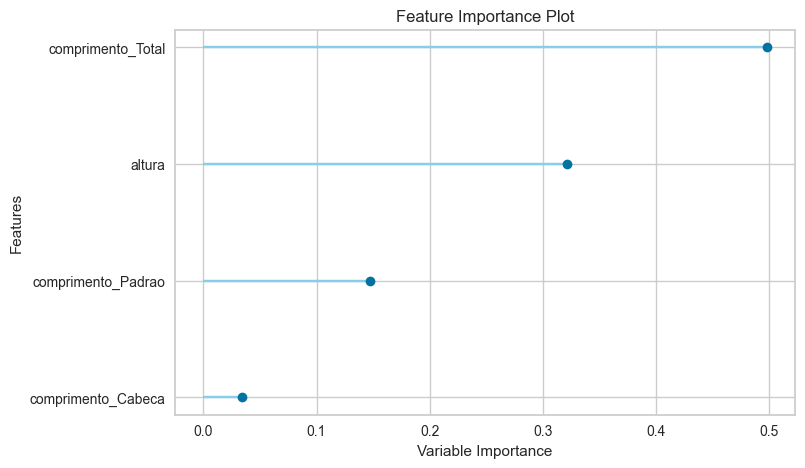

Processing DataFrame 2...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.0323,25.2195,4.8472,0.7659,0.0610,0.0516,0.0070
lasso,Lasso Regression,4.1226,27.3634,5.0270,0.7524,0.0624,0.0524,0.0080
llar,Lasso Least Angle Regression,4.1226,27.3634,5.0270,0.7524,0.0624,0.0524,0.0070
rf,Random Forest Regressor,4.3344,29.0763,5.2497,0.7278,0.0654,0.0549,0.0380
et,Extra Trees Regressor,4.6040,31.3628,5.5120,0.7097,0.0679,0.0583,0.0300
ada,AdaBoost Regressor,4.5113,31.7341,5.5207,0.7067,0.0689,0.0576,0.0220
xgboost,Extreme Gradient Boosting,4.8290,35.6082,5.8224,0.6628,0.0723,0.0612,0.0120
lightgbm,Light Gradient Boosting Machine,4.8717,39.5833,6.1074,0.6559,0.0750,0.0614,0.0230
knn,K Neighbors Regressor,4.7323,40.5462,6.0611,0.6528,0.0740,0.0603,0.0080
gbr,Gradient Boosting Regressor,4.8813,35.7618,5.9113,0.6455,0.0743,0.0623,0.0170


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9075,13.1455,3.6257,0.7479,0.0458,0.0384
1,3.3082,17.1511,4.1414,0.9090,0.0490,0.0395
2,3.2481,16.0018,4.0002,0.8268,0.0548,0.0446
3,4.4637,28.1125,5.3021,0.8191,0.0673,0.0581
4,3.7246,19.9189,4.4631,0.7502,0.0572,0.0480
5,3.9587,23.8671,4.8854,0.7838,0.0567,0.0465
6,2.7243,10.9403,3.3076,0.9223,0.0460,0.0367
7,6.9994,64.8847,8.0551,0.5742,0.1036,0.0920
8,5.0776,36.7081,6.0587,0.5649,0.0752,0.0663


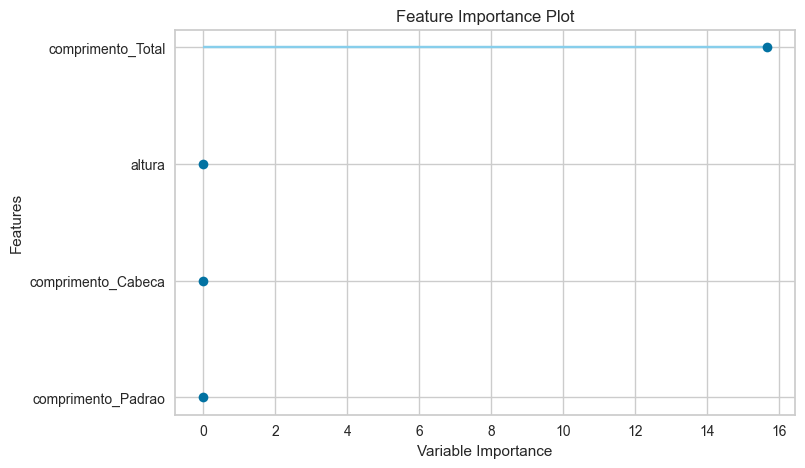

Processing DataFrame 3...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,5.8499,50.0680,6.8544,0.8422,0.0521,0.0454,0.0110
br,Bayesian Ridge,5.8670,50.0079,6.8527,0.8417,0.0522,0.0456,0.0130
lr,Linear Regression,5.8910,50.2351,6.8705,0.8405,0.0525,0.0458,0.0100
lar,Least Angle Regression,5.8910,50.2352,6.8705,0.8405,0.0525,0.0458,0.0140
huber,Huber Regressor,6.0198,52.7360,7.0145,0.8347,0.0533,0.0466,0.0160
knn,K Neighbors Regressor,6.1208,58.4327,7.2682,0.8114,0.0550,0.0472,0.0120
llar,Lasso Least Angle Regression,6.4096,64.6216,7.7525,0.7973,0.0580,0.0490,0.0150
lasso,Lasso Regression,6.4098,64.6243,7.7528,0.7972,0.0580,0.0490,0.0130
et,Extra Trees Regressor,6.5360,65.8863,7.9014,0.7634,0.0588,0.0500,0.0550
en,Elastic Net,7.3094,88.1553,8.9589,0.7544,0.0681,0.0566,0.0110


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4993,30.9697,5.5650,0.9237,0.0422,0.0340
1,7.5230,70.4379,8.3927,0.8144,0.0720,0.0654
2,7.1591,64.8692,8.0541,0.8511,0.0621,0.0556
3,3.5739,23.4378,4.8413,0.9528,0.0341,0.0271
4,3.9511,21.7860,4.6675,0.9202,0.0446,0.0368
5,7.8059,91.1653,9.5481,0.7310,0.0631,0.0531
6,7.5487,71.2141,8.4388,0.7483,0.0634,0.0584
7,4.1142,23.1199,4.8083,0.8422,0.0359,0.0315
8,7.1241,67.6295,8.2237,0.9033,0.0598,0.0528


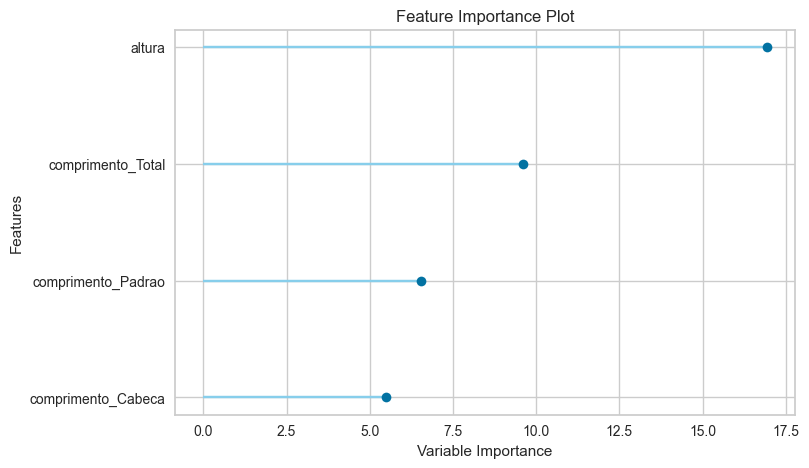

Processing DataFrame 4...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,12.1465,245.9016,15.0378,0.7473,0.0654,0.0528,0.0190
llar,Lasso Least Angle Regression,12.1467,245.9180,15.0383,0.7473,0.0654,0.0528,0.0230
huber,Huber Regressor,12.0122,244.3429,15.1051,0.7466,0.0661,0.0525,0.0250
ridge,Ridge Regression,11.9098,242.9928,14.9947,0.7465,0.0652,0.0519,0.0150
br,Bayesian Ridge,11.9163,243.0572,14.9962,0.7465,0.0653,0.0519,0.0170
lr,Linear Regression,11.9286,245.1312,15.0725,0.7439,0.0656,0.0520,0.0260
lar,Least Angle Regression,11.9286,245.1310,15.0725,0.7439,0.0656,0.0520,0.0210
en,Elastic Net,13.6328,294.9855,16.7957,0.7236,0.0748,0.0603,0.0210
omp,Orthogonal Matching Pursuit,14.3785,304.9206,16.8419,0.6995,0.0749,0.0635,0.0160
knn,K Neighbors Regressor,14.4965,340.7649,17.6684,0.6774,0.0791,0.0646,0.0230


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.4817,352.3549,18.7711,0.7919,0.0850,0.0700
1,10.9524,180.9680,13.4524,0.8328,0.0590,0.0484
2,5.0536,81.3802,9.0211,0.9201,0.0446,0.0252
3,15.1321,382.6401,19.5612,0.4301,0.0794,0.0623
4,6.8014,58.3983,7.6419,0.9629,0.0355,0.0319
5,14.4911,300.3033,17.3293,0.4334,0.0690,0.0579
6,17.1055,428.3651,20.6970,0.6182,0.0807,0.0656
7,13.3989,278.4830,16.6878,0.7448,0.0638,0.0537
8,14.3007,295.7437,17.1972,0.7790,0.0846,0.0708


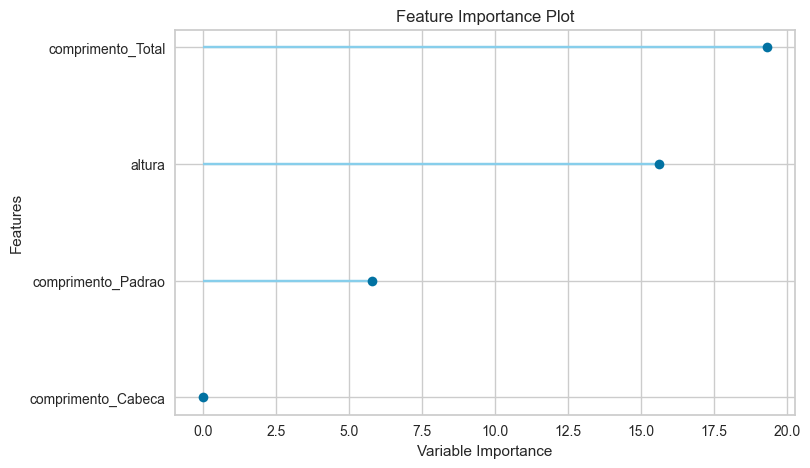

Processing DataFrame 5...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,20.1201,779.8692,26.1318,0.5977,0.0917,0.0715,0.0240
en,Elastic Net,19.7017,737.1387,25.3992,0.5822,0.0862,0.0684,0.0190
llar,Lasso Least Angle Regression,17.9580,678.8076,23.6553,0.5803,0.0772,0.0609,0.0200
lasso,Lasso Regression,17.9588,678.8774,23.6558,0.5802,0.0772,0.0609,0.0200
ridge,Ridge Regression,17.8012,675.9267,23.5687,0.5771,0.0765,0.0600,0.0210
br,Bayesian Ridge,17.8824,677.5490,23.6319,0.5771,0.0768,0.0603,0.0240
lr,Linear Regression,17.8105,683.0002,23.6452,0.5725,0.0767,0.0599,0.0290
lar,Least Angle Regression,17.8105,683.0002,23.6452,0.5725,0.0767,0.0599,0.0180
huber,Huber Regressor,17.4816,688.5418,23.2060,0.5582,0.0749,0.0590,0.0260
omp,Orthogonal Matching Pursuit,19.8937,751.5890,25.4663,0.5226,0.0833,0.0674,0.0200


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.9598,766.4172,27.6842,0.7891,0.0974,0.0865
1,18.8682,596.5208,24.4238,0.8363,0.0758,0.0605
2,32.7412,2179.9788,46.6902,-0.2017,0.1570,0.1170
3,12.4222,231.9365,15.2295,0.5074,0.0478,0.0395
4,17.3392,727.7983,26.9777,0.2024,0.0913,0.0594
5,29.6650,1631.2601,40.3889,0.7586,0.2008,0.1448
6,20.8655,662.8318,25.7455,0.6685,0.0791,0.0655
7,12.4213,201.6161,14.1992,0.9248,0.0486,0.0422
8,15.7308,369.8109,19.2305,0.7299,0.0575,0.0484


TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [7]:
def automate_modeling(dataframes, target, models_dict):
    results = {}
    for i, df in enumerate(dataframes):
        print(f"Processing DataFrame {i+1}...")
        exp = setup(data=df, target=target, verbose=False)
        best_model = compare_models(n_select=1)
        bm_abbreviation = [abbr for name, abbr in models_dict.items() if best_model.__class__.__name__ in name]
        
        if bm_abbreviation:
            bm = create_model(bm_abbreviation[0])
            plot_model(bm, plot='feature')
            results[f'df{i+1}'] = bm
        else:
            print(f"No matching abbreviation found for the best model: {best_model.__class__.__name__}")

    return results

# Example usage
dataframes = dropped_dataframes
target_column = 'peso'
models_dict = {
    'LinearRegression': 'lr',
    'LassoRegression': 'lasso',
    'RidgeRegression': 'ridge',
    'ElasticNet': 'en',
    'LeastAngleRegression': 'lar',
    'LassoLeastAngleRegression': 'llar',
    'OrthogonalMatchingPursuit': 'omp',
    'BayesianRidge': 'br',
    'AutomaticRelevanceDetermination': 'ard',
    'PassiveAggressiveRegressor': 'par',
    'RandomSampleConsensus': 'ransac',
    'TheilSenRegressor': 'tr',
    'HuberRegressor': 'huber',
    'KernelRidge': 'kr',
    'SupportVectorMachine': 'svm',
    'KNeighborsRegressor': 'knn',
    'DecisionTree': 'dt',
    'RandomForestRegressor': 'rf',
    'ExtraTreesRegressor': 'et',
    'AdaBoostRegressor': 'ada',
    'GradientBoosting': 'gbr',
    'MultiLevelPerceptron': 'mlp',
    'ExtremeGradientBoosting': 'xgboost',
    'LGBMRegressor': 'lightgbm',
    'CatBoostRegressor': 'catboost'
}

# Call the function
results = automate_modeling(dataframes, target_column, models_dict)